In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x=df.drop(['Outcome'],axis=1)

In [4]:
y=df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [2]:
from sklearn.tree import DecisionTreeClassifier 

In [8]:
modeldc=DecisionTreeClassifier()


In [9]:
modeldc.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
modeldc.score(x_train,y_train)

1.0

In [11]:
modeldc.score(x_test,y_test)

0.7239583333333334

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
modelada=AdaBoostClassifier(n_estimators=50,learning_rate=1)


In [14]:
modelada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [15]:
modelada.score(x_test,y_test)

0.7395833333333334

In [16]:
y_predict=modelada.predict(x_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_predict)

0.7395833333333334

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

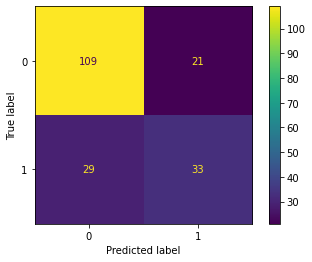

In [20]:
plot_confusion_matrix(modelada,x_test,y_test)
plt.show()

In [21]:
performance=confusion_matrix(y_test,y_predict)
performance

array([[109,  21],
       [ 29,  33]], dtype=int64)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
modelrf=RandomForestClassifier(n_estimators=50)

In [24]:
modelrf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [25]:
modelrf.score(x_train,y_train)

1.0

In [26]:
model_arf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100),n_estimators=50,learning_rate=1)

In [27]:
model_arf.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=1)

In [28]:
model_arf.score(x_train,y_train)

1.0

In [29]:
model_arf.score(x_test,y_test)

0.7552083333333334

In [30]:
y_predict=model_arf.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [31]:
accuracy_score(y_test,y_predict)

0.7552083333333334

In [32]:
confusion_matrix(y_test,y_predict)

array([[111,  19],
       [ 28,  34]], dtype=int64)

In [33]:
from sklearn.svm import SVC

In [34]:
model_asvc=AdaBoostClassifier(base_estimator=SVC(gamma='auto',kernel="linear"),n_estimators=50,learning_rate=1,algorithm='SAMME')

In [35]:
model_asvc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(gamma='auto', kernel='linear'),
                   learning_rate=1)

In [36]:
model_asvc.score(x_train,y_train)

0.7725694444444444

In [37]:
model_asvc.score(x_test,y_test)

0.7447916666666666

In [38]:
y_predict=model_asvc.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [39]:
accuracy_score(y_test,y_predict)

0.7447916666666666